## Clustering Of Countries

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 

The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. The purpose of this Analysis is to solve this problem and list out top 5 counries which are in the direst need of aid.


In [1]:
#importing warnings just to filter warnigs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries and reading the data
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
country_df = pd.read_csv("../input/pca-kmeans-hierarchical-clustering/Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Performing EDA

Let's convert imports,exports and health spending from  percentage values to actual values of their GDP per capita
.Because the percentage values don't give a clear picture of that country. 
For ex. afghanistan and albania have similar imports percentange but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [3]:
#Converting exports,imports and health spending percentages to absolute values.
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [4]:
# checking shape of the,nos. rows and columns
country_df.shape

(167, 10)

In [5]:
#cheking datatypes of each columns
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Checking spelling errors
country_df.country.value_counts()

Oman                              1
Sierra Leone                      1
Solomon Islands                   1
Mauritius                         1
New Zealand                       1
Ukraine                           1
Brunei                            1
Senegal                           1
Netherlands                       1
Latvia                            1
Nepal                             1
Kyrgyz Republic                   1
France                            1
Fiji                              1
Lesotho                           1
Sri Lanka                         1
Qatar                             1
Afghanistan                       1
Cameroon                          1
Singapore                         1
Dominican Republic                1
Cote d'Ivoire                     1
Mali                              1
Germany                           1
Bangladesh                        1
Czech Republic                    1
Russia                            1
Lao                         

In [7]:
#getting sum of null values if any
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**There is no null values present in the data**

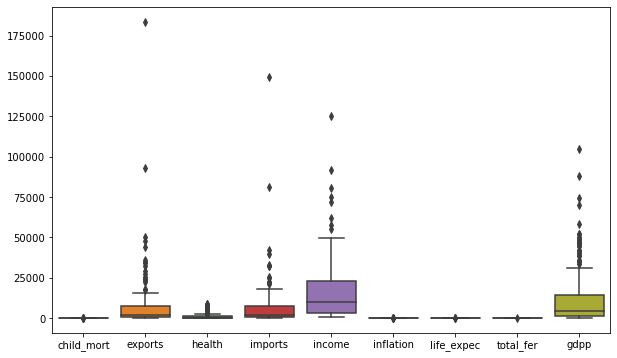

In [8]:
# cheking outliers and data distibution
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (10,6))
boxplot = sns.boxplot(data = country_df)

### Data Preparation

In [9]:
ngo = country_df.pop("country")
ngo.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [10]:
# Standardising values to bring them on to same same comparable scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(country_df)
df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Performing PCA

In [11]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
#Performing PCA
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [13]:
#List of PCA components.
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [14]:
#checking the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

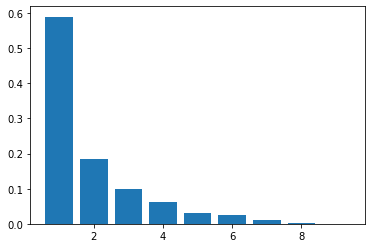

In [15]:
#Plotting variance ratio to visualise variance
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

- The above plot shows that maximum varaiance is explained by first component 

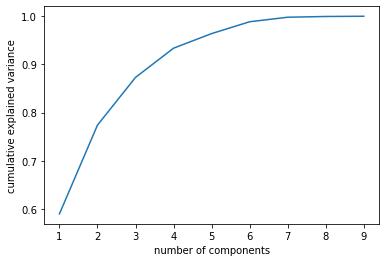

In [16]:
# Ploting scree plot to visusalise how the variance explained by principal components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- The above scree plot shows that around 96% variance is explained by 6 PCs

    Selecting first 6 components


In [17]:
#Understanding how the original 9 columns are loaded on the principal components.
colnames = list(country_df.columns)
pcs_df = pd.DataFrame({ 'Columns':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                      'PC5':pca.components_[4],'PC6':pca.components_[5]})
pcs_df

,Columns,PC1,PC2,PC3,PC4,PC5,PC6
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382


Here we can see that for child_mort the componenets are -0.316392, 0.476267 and so on.

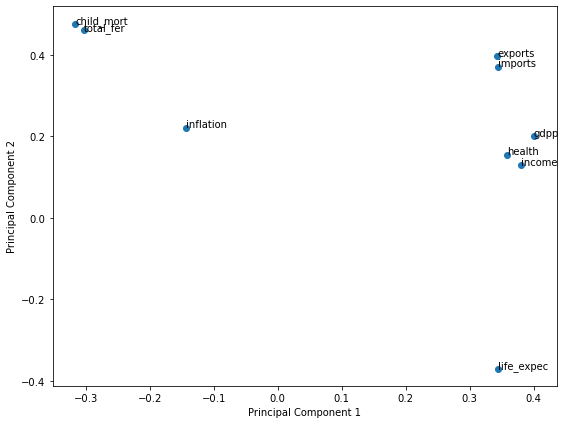

In [18]:
# visualising how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Columns):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

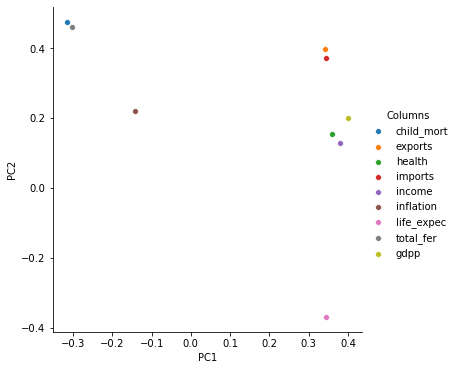

In [19]:
#visulising feture distribution in with first two components
sns.pairplot(data=pcs_df, x_vars=["PC1"], y_vars=["PC2"], hue = "Columns", height=5)

In [20]:
# doing dimenstionality reduction using the six Principal Components
from sklearn.decomposition import IncrementalPCA
pca_reduced = IncrementalPCA(n_components=6)

In [21]:
df_pca = pca_reduced.fit_transform(df_scaled)
df_pca.shape

(167, 6)

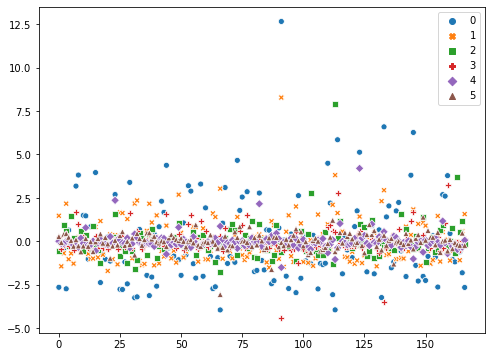

In [22]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(data=df_pca)

In [23]:
df_pca

array([[-2.63546759,  1.47368044, -0.54594172,  0.23513487,  0.01218779,
         0.28722805],
       [-0.02425601, -1.43096079, -0.01764549, -0.44420498, -0.12071592,
        -0.05546744],
       [-0.4596413 , -0.67669459,  0.95748903, -0.21772841, -0.11507274,
         0.41833   ],
       ...,
       [-0.5945261 , -1.07778492,  0.52563246, -0.50462886, -0.32501328,
        -0.22156068],
       [-1.80241048,  0.58818118,  1.18181864,  0.01443748, -0.32584137,
         0.48237115],
       [-2.64433079,  1.5735302 , -0.17006723,  0.16676825,  0.0684485 ,
        -0.22219527]])

In [24]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [25]:
#creating dataframe of dimentianally reduced data
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],'PC6':pc[5]})
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228
1,-0.024256,-1.430961,-0.017645,-0.444205,-0.120716,-0.055467
2,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330
3,-2.722830,2.171831,0.601793,0.433347,0.006694,0.456884
4,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281


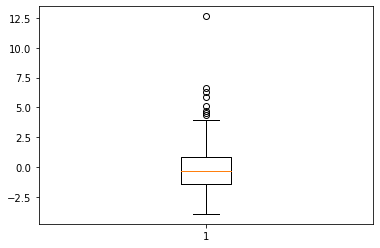

In [26]:
# doing outlier analysis before proceeding to clustering
#using IQR method which removes outliers on the basis of quantiles we define

plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

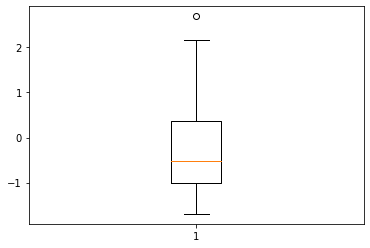

In [27]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

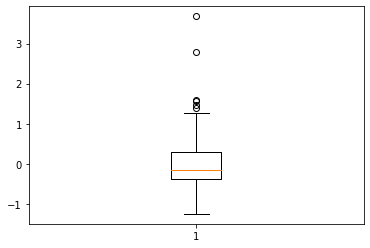

In [28]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

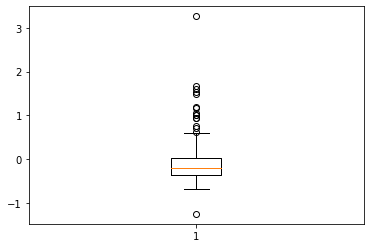

In [29]:
plt.boxplot(pcs_df2.PC4)
Q1 = pcs_df2.PC4.quantile(0.05)
Q3 = pcs_df2.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC4 >= Q1) & (pcs_df2.PC4 <= Q3)]

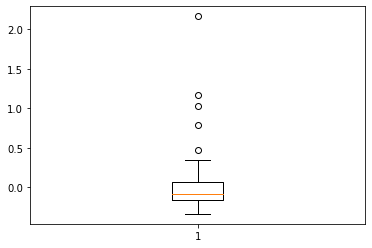

In [30]:
plt.boxplot(pcs_df2.PC5)
Q1 = pcs_df2.PC5.quantile(0.05)
Q3 = pcs_df2.PC5.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC5 >= Q1) & (pcs_df2.PC5 <= Q3)]

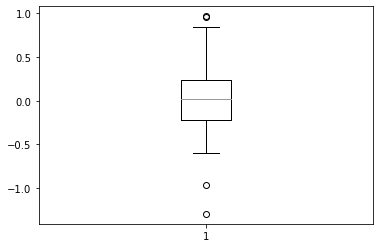

In [31]:
plt.boxplot(pcs_df2.PC6)
Q1 = pcs_df2.PC6.quantile(0.05)
Q3 = pcs_df2.PC6.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC6 >= Q1) & (pcs_df2.PC6 <= Q3)]

In [32]:
#cheking shape of data after outlier treatment
pcs_df2.shape

(85, 6)

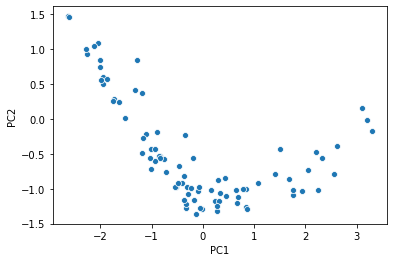

In [33]:
#Visualising the points on the PCs. only first two components
#sns.pairplot(data=pcs_df2)
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

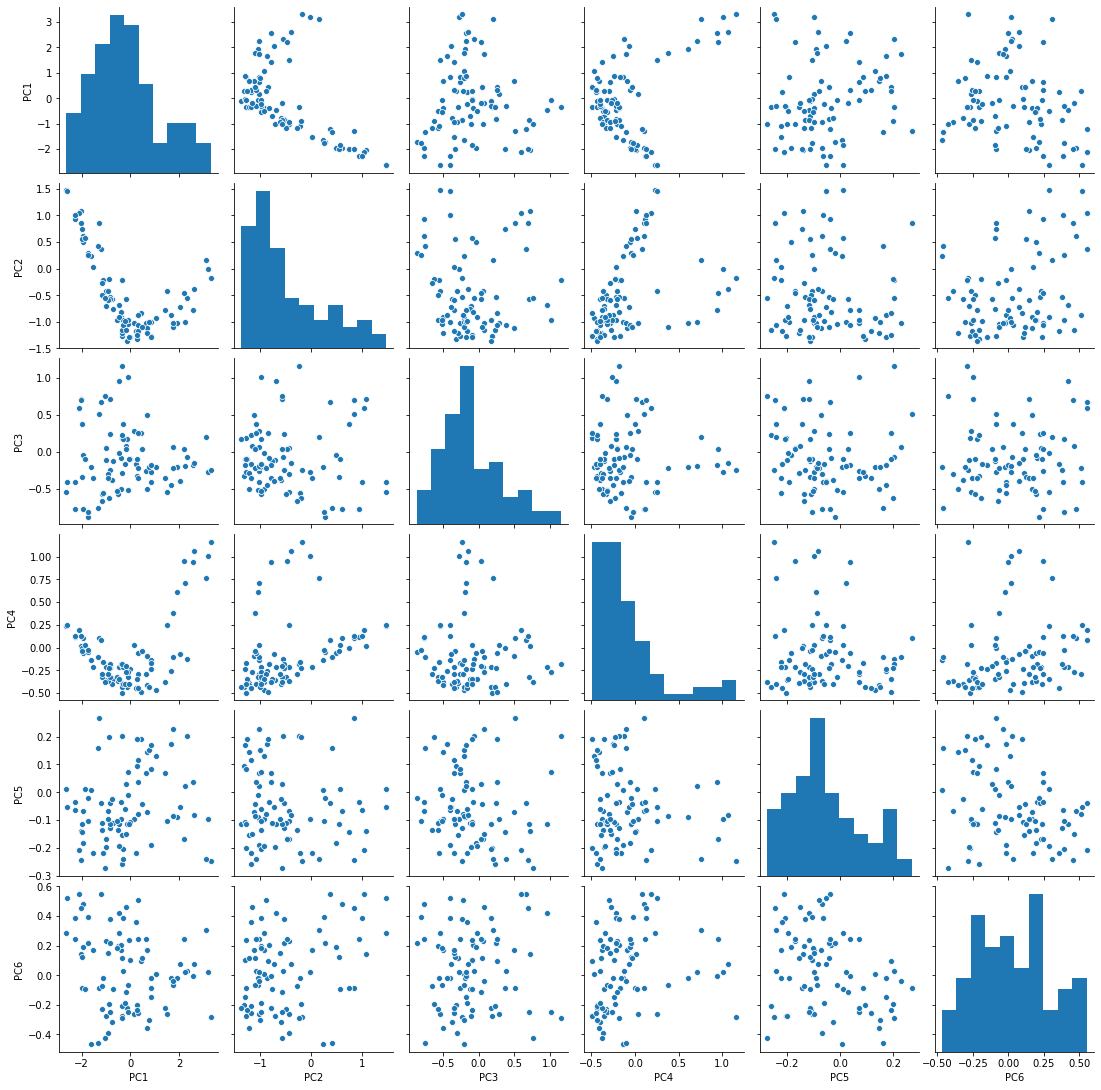

In [34]:
#Visualising relatinship between PCs
sns.pairplot(data=pcs_df2)

### Clustering On PCA modified data

In [35]:
#Calculating the Hopkins statistic to check whether the data is suitable for clutering.
#If the score is greater than 0.5 then data is suitable for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
#checking the Hopkins score for the data set
hopkins(pcs_df2)

0.7838532379447664

In [37]:
#since the Hopkins score may vary on each run. So running again
hopkins(pcs_df2)

0.7450324298449289

- Since Hopkins test score is more than 0.5 in both runs, the data has good tendency for clustring

### K-Means Clustring Analysis

In [38]:
dat1 = pcs_df2

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [40]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.41094869924192823
For n_clusters=3, the silhouette score is 0.4706884860703987
For n_clusters=4, the silhouette score is 0.36105692446514054
For n_clusters=5, the silhouette score is 0.3409491776454629
For n_clusters=6, the silhouette score is 0.3059166294092737
For n_clusters=7, the silhouette score is 0.32663584720048877
For n_clusters=8, the silhouette score is 0.32803535915479554


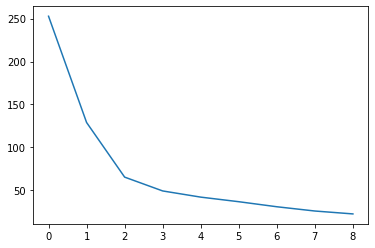

In [41]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From Silhoutte score and Elbow curve making 4 clusters seems a good choice.

In [42]:
#performing K means using K=4

model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [43]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,1
1,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,0
2,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,3
3,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,0
4,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,2


In [44]:
dat_km['ClusterID'].value_counts()

0    30
3    22
1    19
2    14
Name: ClusterID, dtype: int64

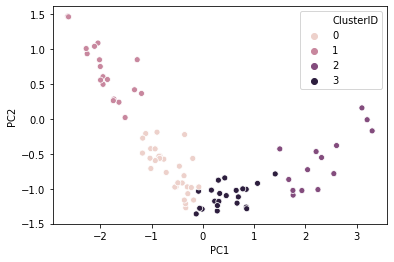

In [45]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

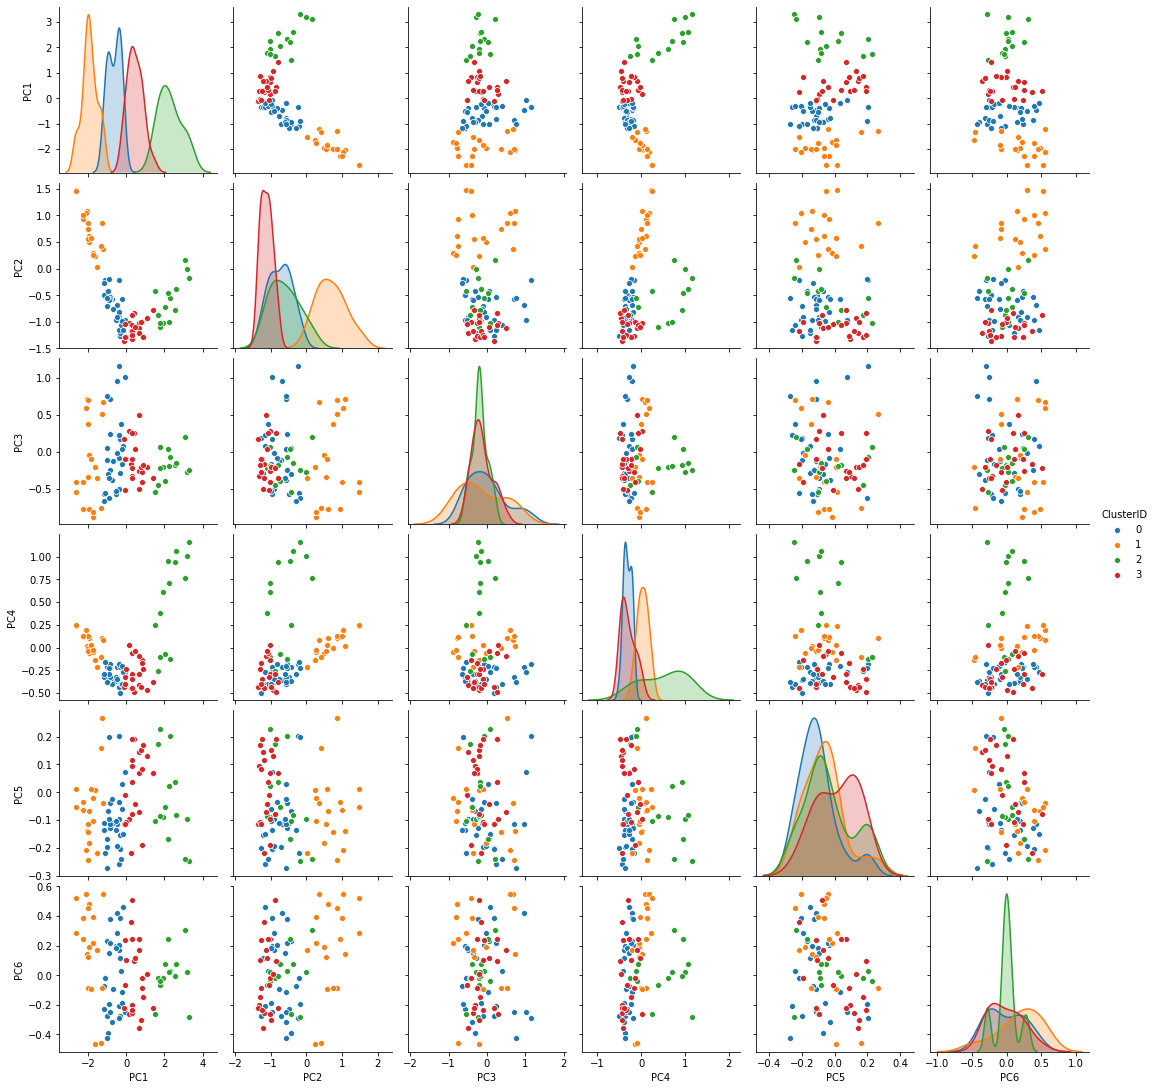

In [46]:
sns.pairplot(hue='ClusterID',data=dat_km)
plt.show()

In [47]:
dat5=pd.merge(country_df,dat_km, left_index=True,right_index=True)
dat5.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,1
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,3
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,2


In [48]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5','PC6'],axis=1)
dat6.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,3
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [49]:
#merging country names
hlp_km =pd.merge(dat6,ngo, left_index=True,right_index=True)
hlp_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,3,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,Antigua and Barbuda


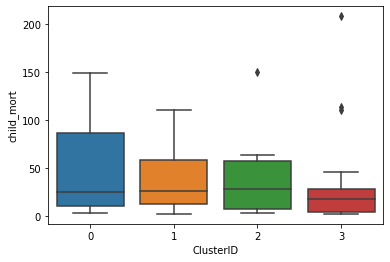

In [50]:
#Visualising child_mort distuibution in each cluster
sns.boxplot(x='ClusterID',y='child_mort', data=dat6)

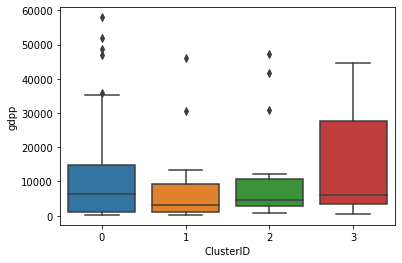

In [51]:
#Visualising gdpp distuibution in each cluster
sns.boxplot(x='ClusterID',y='gdpp', data=dat6)

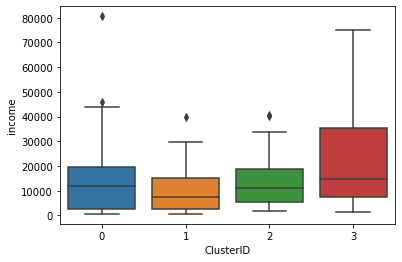

In [52]:
#Visualising income distuibution in each cluster
sns.boxplot(x='ClusterID',y='income', data=dat6)

In [53]:
#Calculating mean of each column

clu_mort = pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())

clu_exports = pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())

clu_health = pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())

clu_imports = pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())

clu_income = pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())

clu_inflation = pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())

clu_life_expec = pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())

clu_total_fer = pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())

clu_gdpp = pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [54]:
df = pd.concat([pd.Series([0,1,2,3]),clu_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,
                clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [55]:
df.columns = ['ClusterID' , 'child_mort', 'exports', 'health', 'imports', 'income',
              'inflation', 'life_expec', 'total_fer', 'gdpp', ]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,48.340000,6533.054233,1123.754263,5581.370700,16772.900000,7.495767,69.590000,3.198333,13302.066667
1,1,38.447368,3090.397684,605.602637,3215.468579,10816.526316,6.466421,70.584211,3.127368,7891.631579
2,2,37.714286,4708.459714,1092.009793,5028.709643,15417.857143,7.154143,69.828571,2.807143,12019.071429
3,3,33.759091,7734.793864,1300.213091,6786.094000,21317.272727,6.323182,71.659091,2.585909,16154.772727


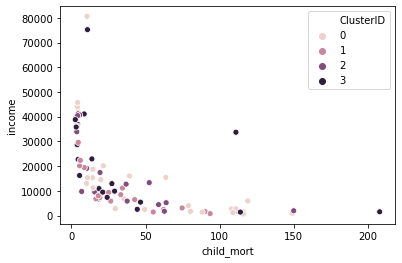

In [56]:
#Visualising income vs child_mort in each cluster
sns.scatterplot(x='child_mort',y='income',hue = "ClusterID",data=dat6)

In [57]:
#making bins for gdpp, and income on the basis of minimum values of their respective means.
#For child_mort higher value of mean
final=country_df[country_df['gdpp'] <= 7891.631579]
final2=final[final['child_mort'] >= 48.340000]
final3=final2[final2['income'] <= 10816.526316]

In [58]:
final3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
12,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
25,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575


In [59]:
#merging country names
final4 =pd.merge(final3,ngo, left_index=True,right_index=True)
final4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan
3,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Angola
12,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758,Bangladesh
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Benin
25,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,Burkina Faso


In [60]:
#performing K means for K=3

model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus3.fit(dat1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [61]:
dat7=pcs_df2
dat7.index = pd.RangeIndex(len(dat7.index))
dat_km2 = pd.concat([dat4, pd.Series(model_clus3.labels_)], axis=1)
dat_km2.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','ClusterID']
dat_km2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,2
1,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,1
2,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,1
3,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,1
4,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,0


In [62]:
dat_km2['ClusterID'].value_counts()

1    49
2    21
0    15
Name: ClusterID, dtype: int64

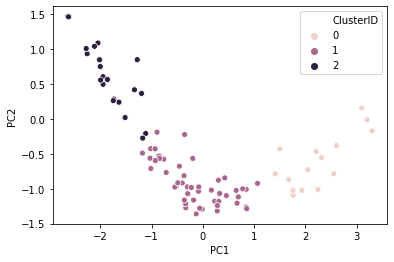

In [63]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km2)

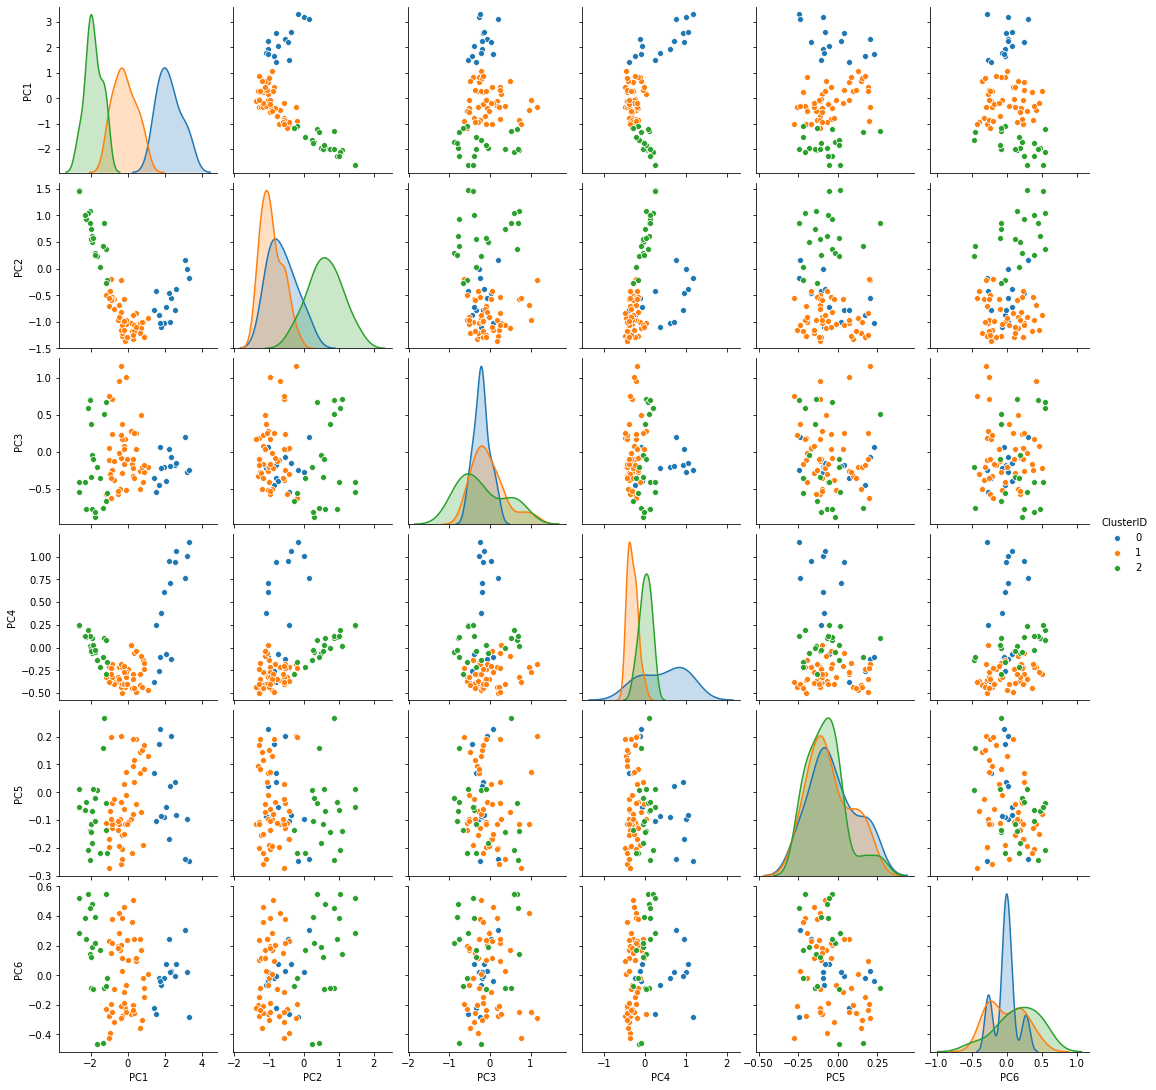

In [64]:
sns.pairplot(hue='ClusterID',data=dat_km2)
plt.show()

In [65]:
dat8=pd.merge(country_df,dat_km2, left_index=True,right_index=True)
dat8.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,PC6,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,0


In [66]:
dat9=dat8.drop(['PC1','PC2','PC3','PC4','PC5','PC6'],axis=1)
dat9.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [67]:
#merging country names
hlp_km2 =pd.merge(dat9,ngo, left_index=True,right_index=True)
hlp_km2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,Antigua and Barbuda


In [68]:
hlp_km2.set_index("country", inplace = True)
hlp_km2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


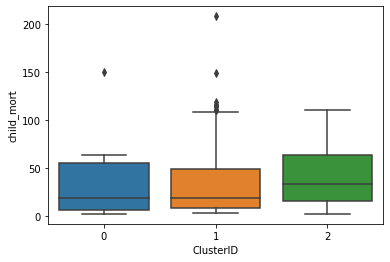

In [69]:
#Visualising child_mort distuibution in each cluster
sns.boxplot(x='ClusterID',y='child_mort', data=hlp_km2)

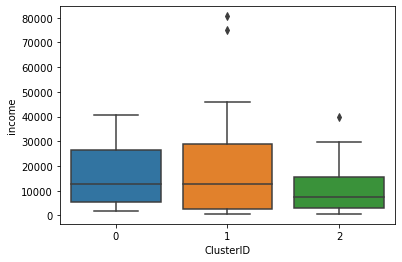

In [70]:
#Visualising child_mort distuibution in each cluster
sns.boxplot(x='ClusterID',y='income', data=hlp_km2)

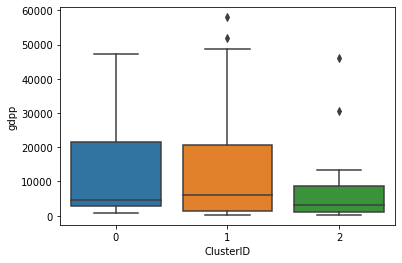

In [71]:
#Visualising child_mort distuibution in each cluster
sns.boxplot(x='ClusterID',y='gdpp', data=hlp_km2)

In [72]:
#Calculating mean of each column

clu_mort = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).child_mort.mean())

clu_exports = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).exports.mean())

clu_health = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).health.mean())

clu_imports = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).imports.mean())

clu_income = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).income.mean())

clu_inflation = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).inflation.mean())

clu_life_expec = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).life_expec.mean())

clu_total_fer = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).total_fer.mean())

clu_gdpp = pd.DataFrame(hlp_km2.groupby(["ClusterID"]).gdpp.mean())

In [73]:
df2 = pd.concat([pd.Series([0,1,2]),clu_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,
                clu_life_expec,clu_total_fer,clu_gdpp], axis=1)
df2.columns = ['ClusterID' , 'child_mort', 'exports', 'health', 'imports', 'income',
              'inflation', 'life_expec', 'total_fer', 'gdpp', ]
df2

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,35.373333,5886.202400,1281.782473,5902.975667,16976.666667,7.041867,70.640000,2.766667,14011.133333
1,1,41.789796,6904.697592,1184.112406,6048.504469,18652.795918,6.790061,70.520408,2.926735,14340.346939
2,2,41.576190,3055.707905,564.936100,3014.746333,10709.238095,7.079143,69.895238,3.173810,7611.000000


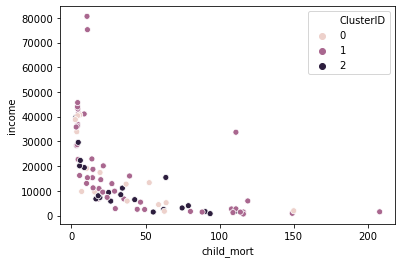

In [74]:
#Visualising income vs child_mort in each cluster
sns.scatterplot(x='child_mort',y='income',hue = "ClusterID",data=hlp_km2)

In [75]:
#making bins for gdpp, and income on the basis of minimum values of their respective means.
#For child_mort higher value of mean
lst = country_df[country_df['gdpp'] <= 7611.000000]
lst2 = lst[lst['child_mort'] >= 41.789796]
lst3 = lst2[lst2['income'] <= 10709.238095]

In [76]:
lst3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
3,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530
12,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
18,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180


In [77]:
#merging country names
lst4 =pd.merge(lst3,ngo, left_index=True,right_index=True)
lst4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,Afghanistan
3,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Angola
12,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758,Bangladesh
17,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Benin
18,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180,Bhutan


As we can see that adding more clusters beyond 3 is not making any significat diffrence. So we can go with 3 clusters.

In [78]:
#sorting top 5 lowest gdpp countries
km1 = lst4.sort_values(by=['gdpp'], 
                           axis=0, ascending=True, inplace=False)
km1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
26,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,Burundi
88,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,Liberia
37,116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,"Congo, Dem. Rep."
112,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,Niger
132,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,Sierra Leone


In [79]:
#sorting top 5 lowest gdpp countries
km2 = lst4.sort_values(by=['income'], 
                           axis=0, ascending=True, inplace=False)
km2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
37,116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,"Congo, Dem. Rep."
88,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,Liberia
26,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,Burundi
112,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,Niger
31,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,Central African Republic


In [80]:
#sorting top 5 lowest gdpp countries
km3 = lst4.sort_values(by=['child_mort'], 
                           axis=0, ascending=False, inplace=False)
km3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
66,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,Haiti
132,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,Sierra Leone
32,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,Chad
31,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,Central African Republic
97,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,Mali


### The top countries based on their child mortality rate, income and gdpp which are dire in need of aid are 

1. Haiti

2. Sierra Leone

3. Chad

4. Central African Republic

5. Mali

### Hierarchical Clustering

In [81]:
#importing libraries to perform hierarachical clustering

import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

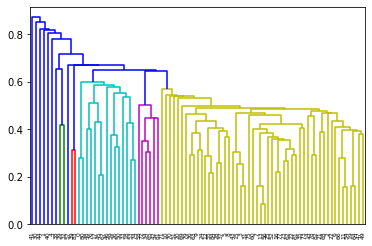

In [82]:
# single linkage
mergings = linkage(dat1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

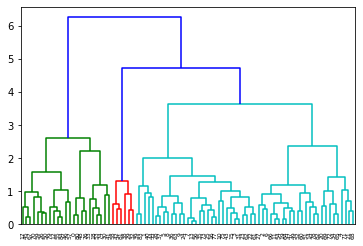

In [83]:
# complete linkage
mergings = linkage(dat1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [84]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0])

In [85]:
# assign cluster labels
dat1['cluster_labels'] = cluster_labels
dat1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,cluster_labels
0,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,0
1,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,1
2,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,1
3,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,1
4,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,1


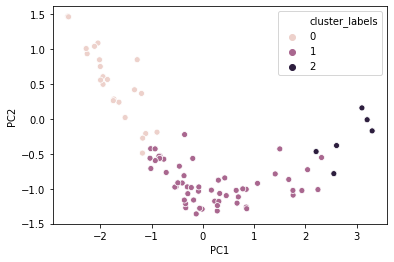

In [86]:
#Visulising PC1 & PC2
sns.scatterplot(x='PC1',y='PC2', hue='cluster_labels',data=dat1)

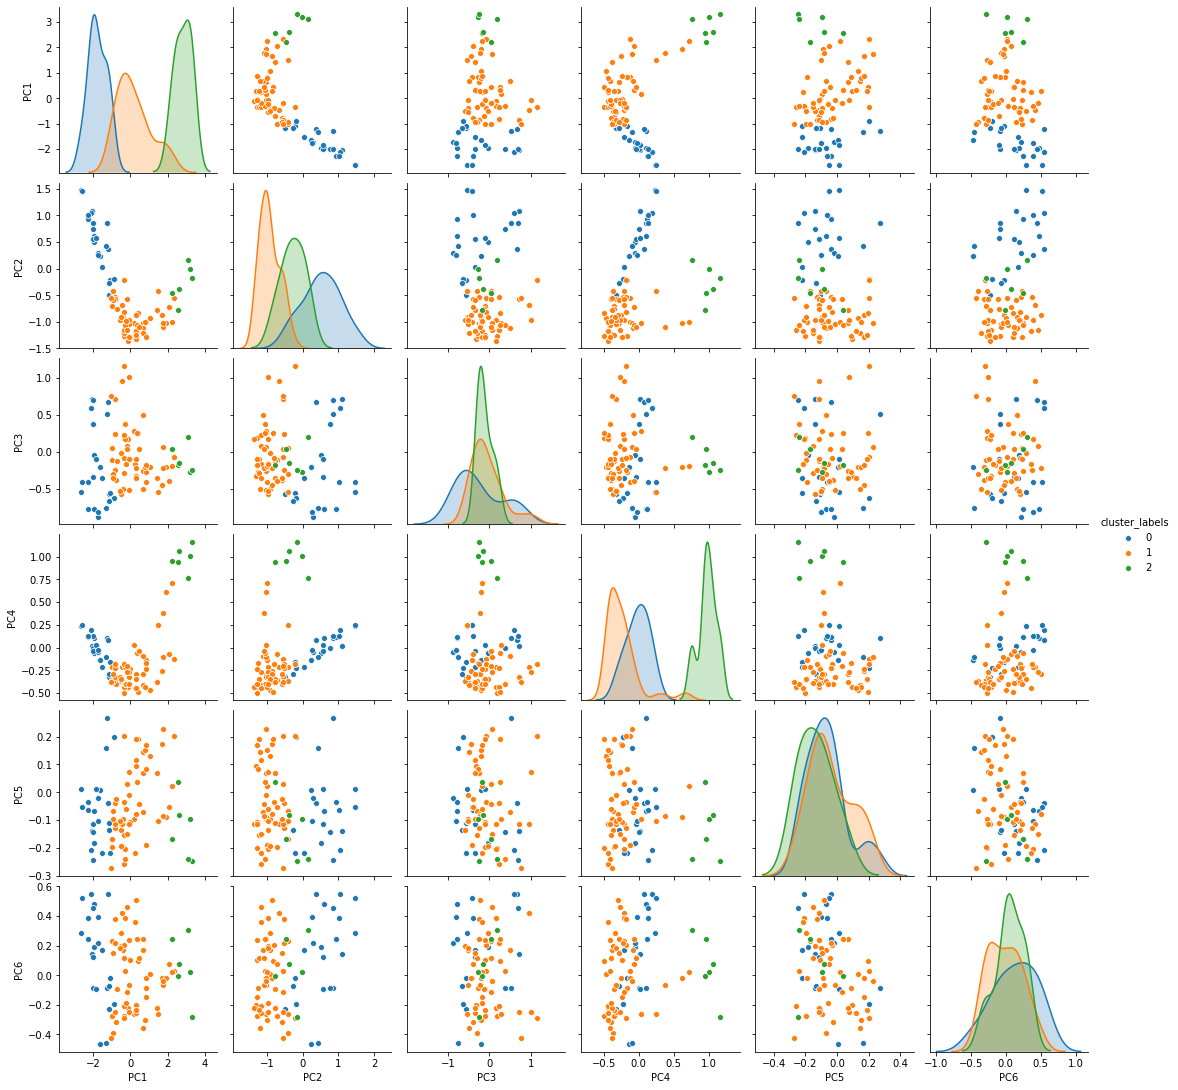

In [87]:
#Visualising each PCs
sns.pairplot(hue='cluster_labels',data=dat1)
plt.show()

In [88]:
#merging original dataframe with cluster labes dataframe i.e after clustering
country_hc =pd.merge(country_df,dat1, left_index=True,right_index=True)
country_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,PC6,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,1


In [89]:
#merging country names
hlp_hc =pd.merge(country_hc,ngo, left_index=True,right_index=True)
hlp_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,PC6,cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635468,1.473680,-0.545942,0.235135,0.012188,0.287228,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.459641,-0.676695,0.957489,-0.217728,-0.115073,0.418330,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0.648645,-1.023454,-0.258842,-0.287943,0.070128,0.242281,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-0.334586,-1.272968,0.187486,-0.495962,-0.202213,-0.273190,1,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.499058,-0.428863,-0.543888,0.251792,-0.104847,-0.260263,1,Antigua and Barbuda


In [90]:
#dropping PCs
hlp_hc=hlp_hc.drop(['PC1','PC2','PC3','PC4','PC5','PC6'],axis=1)
hlp_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,Antigua and Barbuda


In [91]:
#Counting number countries assisgned to clusters
hlp_hc['cluster_labels'].value_counts()

1    56
0    23
2     6
Name: cluster_labels, dtype: int64

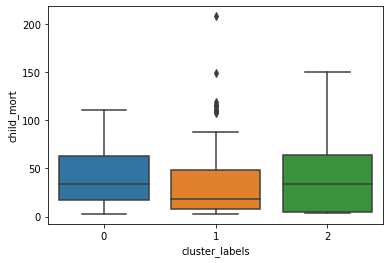

In [92]:
# Visualising child_mort distribution in each cluster
sns.boxplot(x='cluster_labels', y='child_mort', data=hlp_hc)

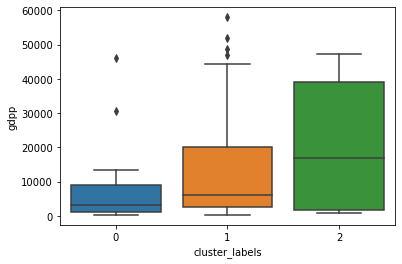

In [93]:
# Visualising gdpp distribution in each cluster
sns.boxplot(x='cluster_labels', y='gdpp', data=hlp_hc)

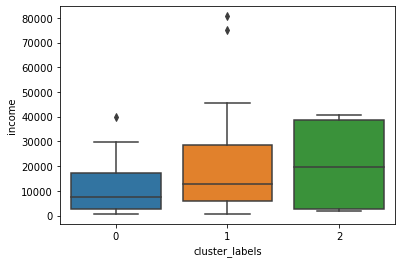

In [94]:
# Visualising income distribution in each cluster
sns.boxplot(x='cluster_labels', y='income', data=hlp_hc)

In [95]:
#sorting top 5 lowest gdpp countries
hc1 = hlp_hc.sort_values(by=['gdpp'], 
                           axis=0, ascending=True, inplace=False)
hc1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
26,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,Burundi
37,116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,"Congo, Dem. Rep."
31,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,Central African Republic
50,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0,Eritrea
64,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,1,Guinea-Bissau


In [96]:
#sorting top 5 highest child_mort countries
hc2 = hlp_hc.sort_values(by=['child_mort'], 
                           axis=0, ascending=False, inplace=False)
hc2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
66,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1,Haiti
32,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,Chad
31,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1,Central African Republic
3,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,Angola
37,116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,1,"Congo, Dem. Rep."


In [97]:
#sorting top 5 lowest income countries
hc3 = hlp_hc.sort_values(by=['income'], 
                           axis=0, ascending=True, inplace=False)
hc3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
37,116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,"Congo, Dem. Rep."
26,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,Burundi
31,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,Central African Republic
63,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,1,Guinea
64,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,1,Guinea-Bissau


**Based on the above analysis the top 5 countries which are in dire need of aid are**

- Child moratility in countries ***Haiti,Chad,Central African Republic, Angola & Congo, Dem. Rep.*** is highest.

- GDP and Income of Angola is also high so they need to resturcture their health system.

- Top 5 lowest gdpp countries are ***Burundi, Congo Dem Rep.,Central African Republic,Eritrea, & Guinea-Bissau***

- Top 5 lowest income countries ***Congo, Dem. Rep.,Burundi,Central African Republic, & Guinea-Bissau.***

- So top 5 countries which are in dire need of aid are

    - ***Haiti, Chad, Central African Replubic, Burundi and Congo.***

### Note

In this solution K-means and Hierarchical don't produce identical insights.This would depend on the way the principal components and the final number of clusters are chosen. It would be perfectly fine if both provide identical insights in any other case